nel 12.1 almeno una 30 di epoche 

12.1

In [26]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#print('X_train shape:', X_train.shape) 
#print('Y_train shape:', Y_train.shape)

In [36]:
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    model = Sequential()
    model.add(Dense(256,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model
    

In [40]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

CREARE PIU FUNZIONI COMPILE PER CONFRONTARE GLI OTTIMIZZATORI

In [42]:
batch_size = 32
epochs = 30

model_DNN = compile_model()

history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30


2025-06-05 15:20:14.809625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-06-05 15:20:14.814910: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.5616 - loss: 1.2729 - val_acc: 0.8799 - val_loss: 0.3939
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - acc: 0.8584 - loss: 0.4851 - val_acc: 0.9109 - val_loss: 0.2945
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - acc: 0.8960 - loss: 0.3742 - val_acc: 0.9331 - val_loss: 0.2225
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - acc: 0.9201 - loss: 0.2910 - val_acc: 0.9477 - val_loss: 0.1768
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - acc: 0.9346 - loss: 0.2380 - val_acc: 0.9531 - val_loss: 0.1536
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9453 - loss: 0.1993 - val_acc: 0.9580 - val_loss: 0.1376
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9505 - loss: 0.1771 - val_acc: 0.9597 - val_loss: 0.1359
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - acc: 0.9577 - loss: 0.1564 - val_acc: 0.9635 - val_loss: 0.1209
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9672 - loss: 0.1619

Test loss: 0.1331886351108551
Test accuracy: 0.9736999869346619


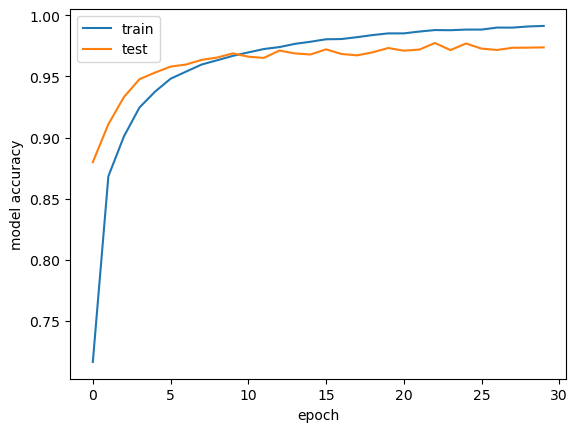

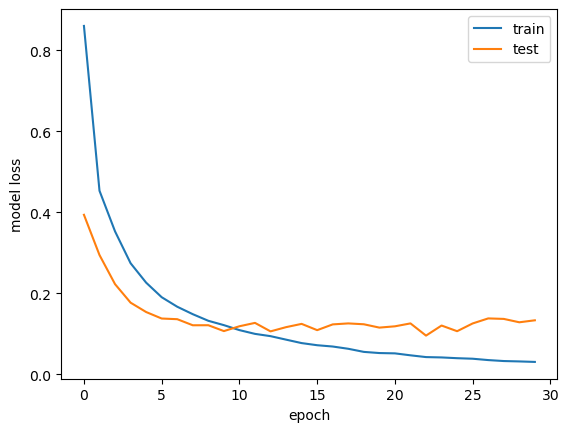

In [46]:
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

102/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

2025-06-05 15:36:21.599491: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


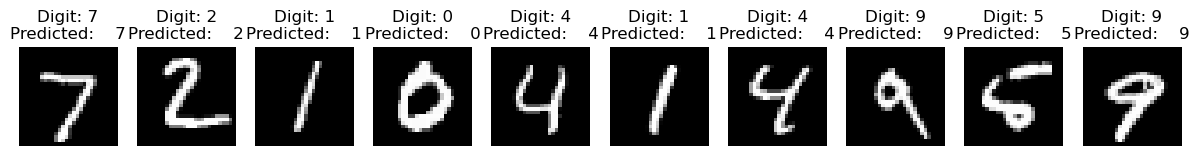

In [48]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

14.2

In [383]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [385]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

In [387]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     strides=1,
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     strides=1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) #?
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adamax',
                  metrics=['acc'])
    return model

In [389]:
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
historyC = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          validation_data=(X_test, Y_test))


Epoch 1/30


2025-06-06 17:27:50.884410: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - acc: 0.7400 - loss: 0.8377 - val_acc: 0.9615 - val_loss: 0.1317
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - acc: 0.9413 - loss: 0.2017 - val_acc: 0.9722 - val_loss: 0.0898
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - acc: 0.9568 - loss: 0.1503 - val_acc: 0.9766 - val_loss: 0.0709
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9642 - loss: 0.1233 - val_acc: 0.9820 - val_loss: 0.0585
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - acc: 0.9678 - loss: 0.1093 - val_acc: 0.9828 - val_loss: 0.0530
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - acc: 0.9717 - loss: 0.1002 - val_acc: 0.9842 - val_loss: 0.0473
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - acc: 0.9731 - loss: 0.0896 - val_acc: 0.9847 - val_loss: 0.0453
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9758 - loss: 0.0852 - val_acc: 0.9859 - val_loss: 0.0428
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9894 - loss: 0.0353 

Test loss: 0.029047342017292976
Test accuracy: 0.9916999936103821


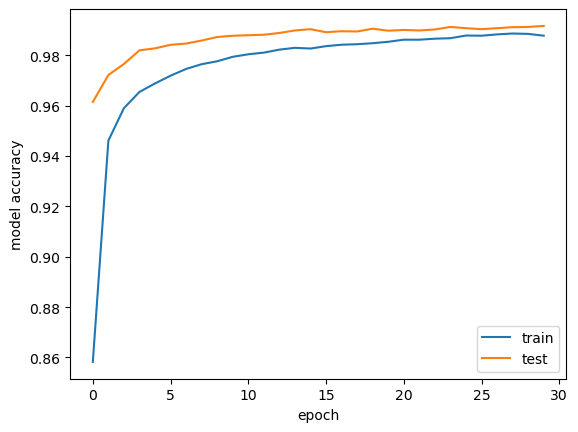

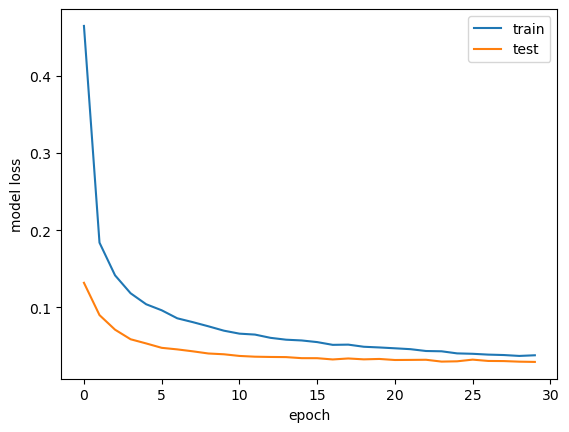

In [391]:
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(historyC.history['acc'])
plt.plot(historyC.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(historyC.history['loss'])
plt.plot(historyC.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:04 206ms/step

2025-06-06 17:44:42.276228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


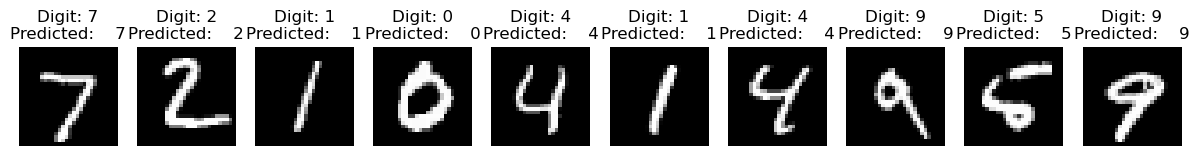

In [393]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

14.3

Image size: 28x28


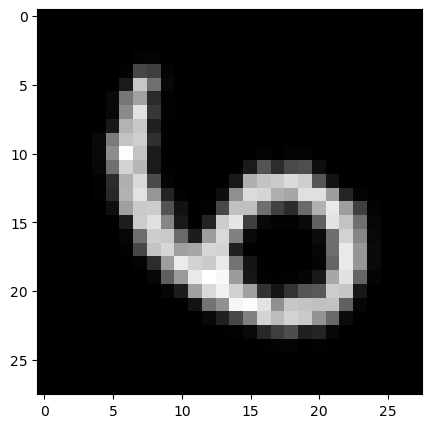

(28, 28)


In [417]:
from PIL import Image
import os

digit_filename = "./sei.png"
digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

CNN sta overfittando il mnist???

(28, 28)
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


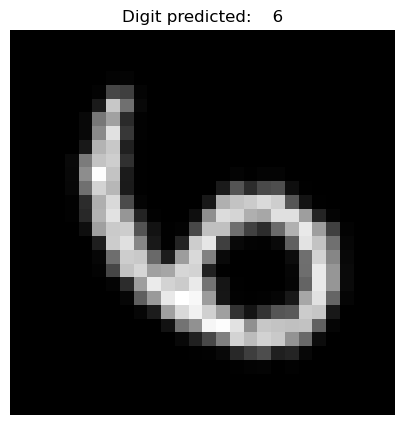

In [419]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[9.9968148e-08 4.4157376e-09 1.6058453e-10 4.4118886e-10 3.0736071e-08
  8.9710702e-05 9.9990821e-01 3.2168448e-12 1.8949058e-06 3.2987538e-10]]


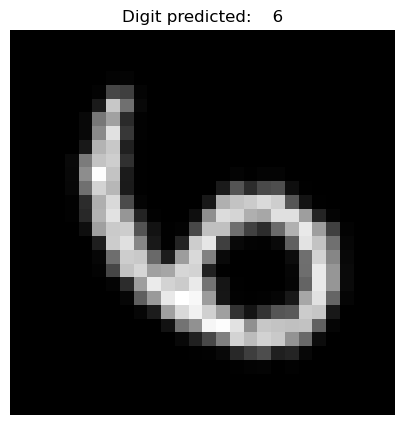

In [421]:
print(data.shape)
data = data.reshape(1,28,28,1)
print(data.shape)
pred_1 = model_CNN.predict(data)
print(pred_1)
data = data.reshape(28,28)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_1)))
plt.axis('off') 
plt.show()